# Forest Fires Analysis

The dataset we will use is from the UCI Machine Learning Repository [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) project. A 517-record dataset
has been sampled and downloaded from this project and presented 
as a csv file at https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

Here is the attribute information as reported on the project:

### Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).


In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [86]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

# Temperature vs. Area Burned

In [87]:
dftemp = df[['temp', 'area']]
dftemp.columns = ['Temp', 'Area']
dftemp.dtypes
dftemp.corr()

,Temp,Area
Temp,1.000000,0.097844
Area,0.097844,1.000000


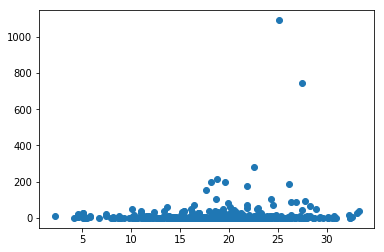

In [88]:
plt.scatter(dftemp.Temp,dftemp.Area)
plt.show()

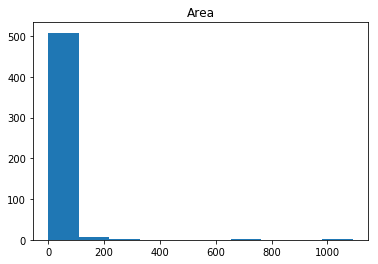

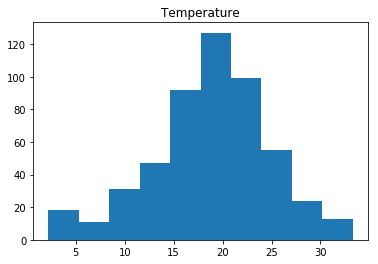

In [89]:
plt.hist(dftemp.Area)
plt.title('Area')
plt.show()
plt.hist(dftemp.Temp)
plt.title('Temperature')
plt.show()

In the Area histogram above, most of the burned area is less than 100. Although the outliers actually happened, it is rare that that much forest area burns so I will reduce the data set and only look at datapoints with areas less than 100. In addition, the area burned must be greater than 0 or else there was no forest fire. 

In [90]:
dffire = dftemp[dftemp.Area > 0]
dffire = dffire[dffire.Area < 100]

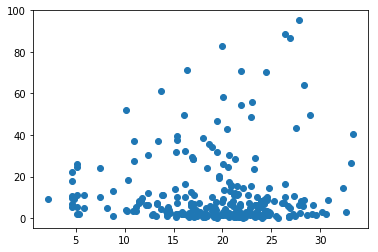

In [91]:
plt.scatter(dffire.Temp,dffire.Area)
plt.show()

In [92]:
dffire.corr()

,Temp,Area
Temp,1.000000,0.042768
Area,0.042768,1.000000


### Analysis of Area Burned related to Temperature:
In conclusion the temperature and area burned of forest fires in Portugal are not related. 

# Temperature vs. Humidity

In [93]:
dfhumid = df[['RH', 'temp']]
dfhumid.columns = ['Humidity', 'Temp']
dfhumid.dtypes
dfhumid.corr()

,Humidity,Temp
Humidity,1.00000,-0.52739
Temp,-0.52739,1.00000


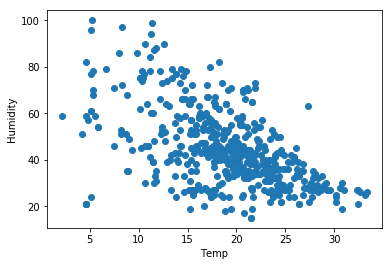

In [94]:
plt.scatter(dfhumid.Temp,dfhumid.Humidity)
plt.xlabel(dfhumid.Temp.name)
plt.ylabel(dfhumid.Humidity.name)
plt.show()

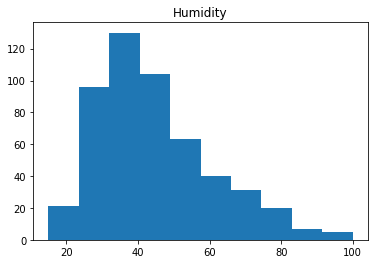

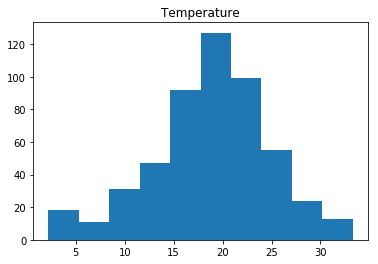

In [95]:
plt.hist(dfhumid.Humidity)
plt.title('Humidity')
plt.show()
plt.hist(dfhumid.Temp)
plt.title('Temperature')
plt.show()

### Analysis of Temperature related to Humidity:
In conclusion the temperature and humidity in Portugal are *inversely* related. As temperature increases, humidity decreases and vice versa. The histograms also some that we are have a clean set of data as both Humidity and Temperature are normally distributed (although Humidity is skewed right).
